In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from src.benchmark import *
from src.algorithm import *
from src.temperature import *

In [2]:
def score(x):
    return -abs(rastrigin(x))

In [3]:
#x = np.random.uniform(-5.12, 5.12, 10)
x = np.array([5.12, 5.12])
LOG = [x]
TABU = []
TABU_SIZE = 10
R = 0.1
T = 10

BEST_POINT = 0
BEST_SCORE = -np.inf

for _ in tqdm(range(10000)):
    y = random_valid_neighbour(x, R, TABU, clip=5.12, alpha=0.5)

    p_a = np.exp(-np.abs(score(y) - score(x)) / T)

    if score(y) > BEST_SCORE:
        BEST_POINT = y
        BEST_SCORE = score(y)

    if score(y) > score(x) or np.random.uniform(0, 1) < p_a:
        x = y
        TABU.append(x)
    LOG.append(y)

    if len(TABU) >= TABU_SIZE:
        TABU.pop(0)

In [4]:
BEST_POINT, BEST_SCORE

(array([-0.01025125, -0.9858183 ]), -1.0323525522736396)

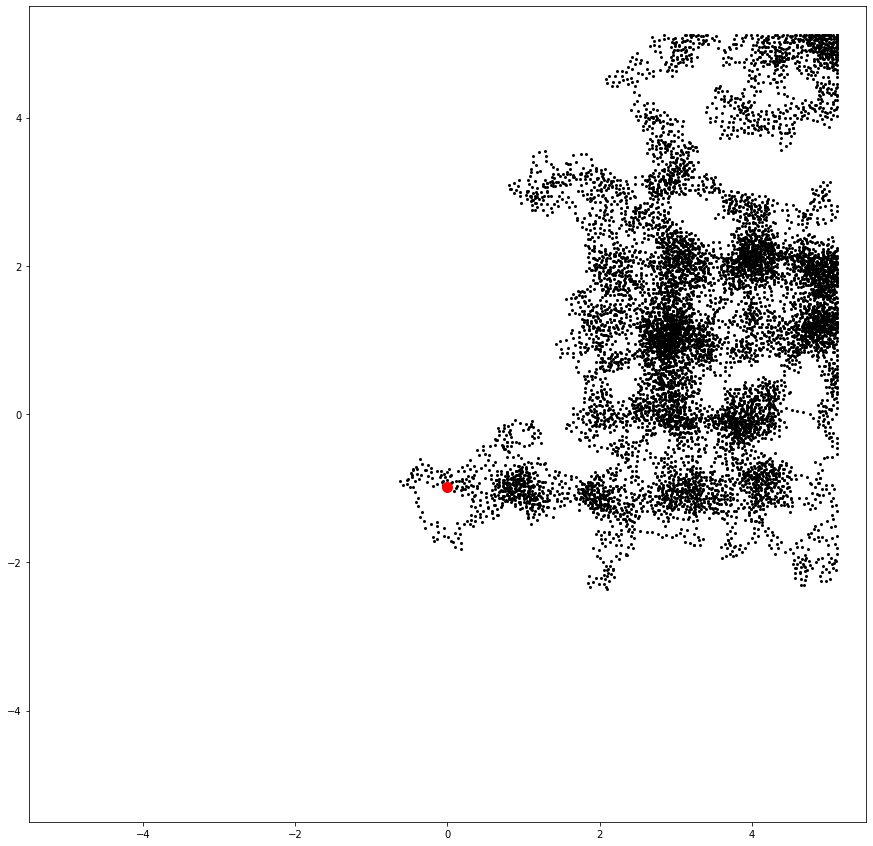

In [5]:
plt.figure(figsize=(15, 15))
plt.xlim(-5.5, 5.5)
plt.ylim(-5.5, 5.5)
for h in tqdm(LOG):
    plt.plot(h[0], h[1], color="black", marker="o", markersize=2)
plt.plot(BEST_POINT[0], BEST_POINT[1], color="red", marker="o", markersize=10)
plt.show()